In [1]:
%pylab inline

from matplotlib.mlab import griddata
from PyTools import binner
from scipy.ndimage.filters import gaussian_filter
import pres_style, os

Populating the interactive namespace from numpy and matplotlib


In [2]:
if "paper_style" in dir():
    od = os.path.expandvars("$HOME/Documents/Papers/photofit_near_paper/")
else:
    od = "img/"

In [3]:
#u_obs, g_obs, r_obs, i_obs, z_obs, redshift = loadtxt("../inputs/total_photometry.txt", usecols=range(1, 6)+[11], unpack=True)
u_obf, g_obf, r_obf, i_obf, z_obf, rs_sam = loadtxt("data/Samples/ugriz_catalog_of.txt", usecols=range(1, 6)+[11], unpack=True)
u_ref, g_ref, r_ref, i_ref, z_ref = loadtxt("data/Samples/ugriz_catalog_rf.txt", usecols=range(1, 6), unpack=True)
u_lib, g_lib, r_lib, i_lib, z_lib, V, pV = loadtxt("../inputs/SSAG_catalog.txt", usecols=range(40, 40 + 5)+[39,26], unpack=True)
u_set, g_set, r_set, i_set, z_set, Z = loadtxt("../inputs/set3_catalog.txt", usecols=range(39, 39 + 5)+[12], unpack=True)

z001_chab = loadtxt("data/Samples/cb2013_s2_z001y250n_chab_hr_xmiless_ssp.1ABmag", usecols=(1,2,3))
z017_chab = loadtxt("data/Samples/cb2013_s2_z017y279n_chab_hr_xmiless_ssp.1ABmag", usecols=(1,2,3))
z040_chab = loadtxt("data/Samples/cb2013_s2_z040y321n_chab_hr_xmiless_ssp.1ABmag", usecols=(1,2,3))

In [4]:
zmask = rs_sam < 0.01
icolor_x = (u_obf - g_obf)
icolor_y = (g_obf - r_obf)
kcolor_x = (u_ref - g_ref)
kcolor_y = (g_ref - r_ref)
lcolor_x = (u_lib - g_lib)
lcolor_y = (g_lib - r_lib)
scolor_x = (u_set - g_set)
scolor_y = (g_set - r_set)

/home/mejia/Programs/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
/home/mejia/Programs/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
/home/mejia/Programs/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract
/home/mejia/Programs/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract


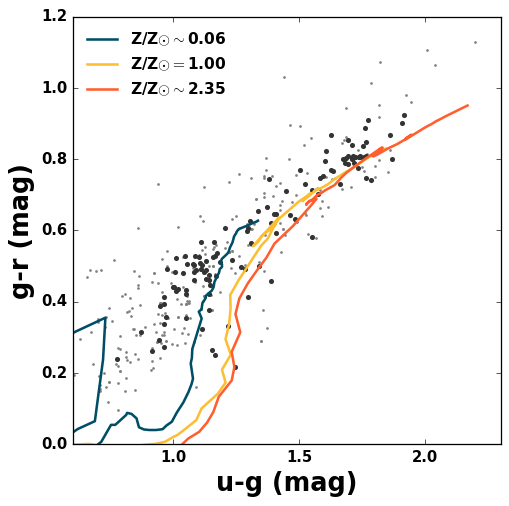

In [5]:
xlm = array((0.6, 2.3))
ylm = array((0.0, 1.2))
axs = subplot(111, xlim=xlm, ylim=ylm)

axs.set_xlabel(r"u-g (mag)")
axs.set_ylabel(r"g-r (mag)")

axs.scatter(icolor_x[zmask], icolor_y[zmask], lw=0, c="0.8", s=4)
axs.scatter(kcolor_x[zmask], kcolor_y[zmask], lw=0, c="0.5", s=4)
axs.scatter(scolor_x, scolor_y, lw=0, c="0.2", s=16)

plot(z001_chab[:, 0]-z001_chab[:, 1], z001_chab[:, 1]-z001_chab[:, 2], "-", color="#004e66", label="Z/Z$\odot\sim$0.06")
plot(z017_chab[:, 0]-z017_chab[:, 1], z017_chab[:, 1]-z017_chab[:, 2], "-", color="#fcbe32", label="Z/Z$\odot=$1.00")
plot(z040_chab[:, 0]-z040_chab[:, 1], z040_chab[:, 1]-z040_chab[:, 2], "-", color="#ff5f2e", label="Z/Z$\odot\sim$2.35")

#Av, x = binner(V-pV, lcolor_x, "median", 20)
#Av, y = binner(V-pV, lcolor_y, "median", 20)
#scatter(x, y, c=Av, lw=0, s=70, cmap=cm.rainbow)
#cb = colorbar()
#cb.set_label("Av (mag)")

legend(loc=2, fontsize=12)

#savefig(od + "samples+ssps.pdf")